## Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px 
from statsmodels.formula.api import ols

default_figsize = (12.8, 4.8)

## Data

### Household Demographic

In [30]:
# Household demographics
df_household = pd.read_csv('dunnhumby/hh_demographic.csv', sep = ',')

#### Data Cleaning

In [31]:
# correct dtypes
df_household['MARITAL_STATUS_CODE'] = df_household['MARITAL_STATUS_CODE'].astype('category')
df_household['HOMEOWNER_DESC'] =  df_household['HOMEOWNER_DESC'].astype('category')
df_household['HH_COMP_DESC'] = df_household['HH_COMP_DESC'].astype('category')
df_household['HOUSEHOLD_SIZE_DESC'] = pd.Categorical(df_household['HOUSEHOLD_SIZE_DESC'].values, categories=['1', '2', '3', '4', '5+'], ordered=True)
df_household['KID_CATEGORY_DESC'] = pd.Categorical(df_household['KID_CATEGORY_DESC'].values, categories=['None/Unknown', '1', '2', '3+'], ordered=True)

# merge some income categories
cat_to_combine_under50K = ["Under 15K", "15-24K", "25-34K", "35-49K"]
cat_to_combine_between50K_100K = ["50-74K", "75-99K"]
cat_to_combine_over100K = ["100-124K", "125-149K", "150-174K", "175-199K", "200-249K", "250K+"]
def combine_cat_income(x):
    if x in cat_to_combine_over100K:
        return "100K+"
    elif x in cat_to_combine_between50K_100K:
        return "50-99K"
    elif x in cat_to_combine_under50K:
        return "Under 50K"
    else:
        print(x)
        return 'ERROR'
    
df_household['INCOME_DESC'] = df_household['INCOME_DESC'].apply(combine_cat_income)

# merge some age categories
cat_to_combine_over55 = ["55-64", "65+"]
cat_to_combine_under35 = ["19-24", "25-34"]
def combine_cat_age(x):
    if x in cat_to_combine_over55:
        return "55+" 
    elif x in cat_to_combine_under35:
        return "19-34"
    else: 
        return x
    
df_household['AGE_DESC'] = df_household['AGE_DESC'].apply(combine_cat_age)

# merge single categories
cat_to_combine_single = ["Single Male", "Single Female"]

def combine_cat_hh_comp(x):
    if x in cat_to_combine_single:
        return "1 Adult"
    elif x == "2 Adults No Kids":
        return "2 Adults"
    else:
        return x
df_household['HH_COMP_DESC'] = df_household['HH_COMP_DESC'].apply(combine_cat_hh_comp)

# correct dtypes
df_household['INCOME_DESC'] = pd.Categorical(df_household['INCOME_DESC'].values, categories=['Under 50K', '50-99K', '100K+'], ordered=True)
df_household['AGE_DESC'] = pd.Categorical(df_household['AGE_DESC'].values, categories=['19-34', '35-44', '45-54', '55+'], ordered=True)
df_household['HH_COMP_DESC'] = pd.Categorical(df_household['HH_COMP_DESC'].values, categories=['1 Adult','1 Adult Kids','2 Adults','2 Adults Kids'], ordered=True)

### Products

In [32]:
df_products = pd.read_csv('dunnhumby/product.csv', sep = ',')
df_food_products = pd.read_csv('data/food_products.csv')
df_meat_products = pd.read_csv('data/meat_products.csv')
df_veggies_products = pd.read_csv('data/vegetables_products.csv')

### Transactions

In [33]:
spent_by_household = pd.read_csv("data/spent_by_household.csv")

df_transactions = pd.read_csv("data/clean_transactions.csv")
df_food_transactions = pd.read_csv("data/food_transactions.csv")

df_pure_meat = pd.read_csv('data/pure_meat_products.csv')
df_veggies_prducts = pd.read_csv('data/vegetables_products.csv')
df_products = pd.read_csv("dunnhumby/product.csv")

## Distribution of Demographics

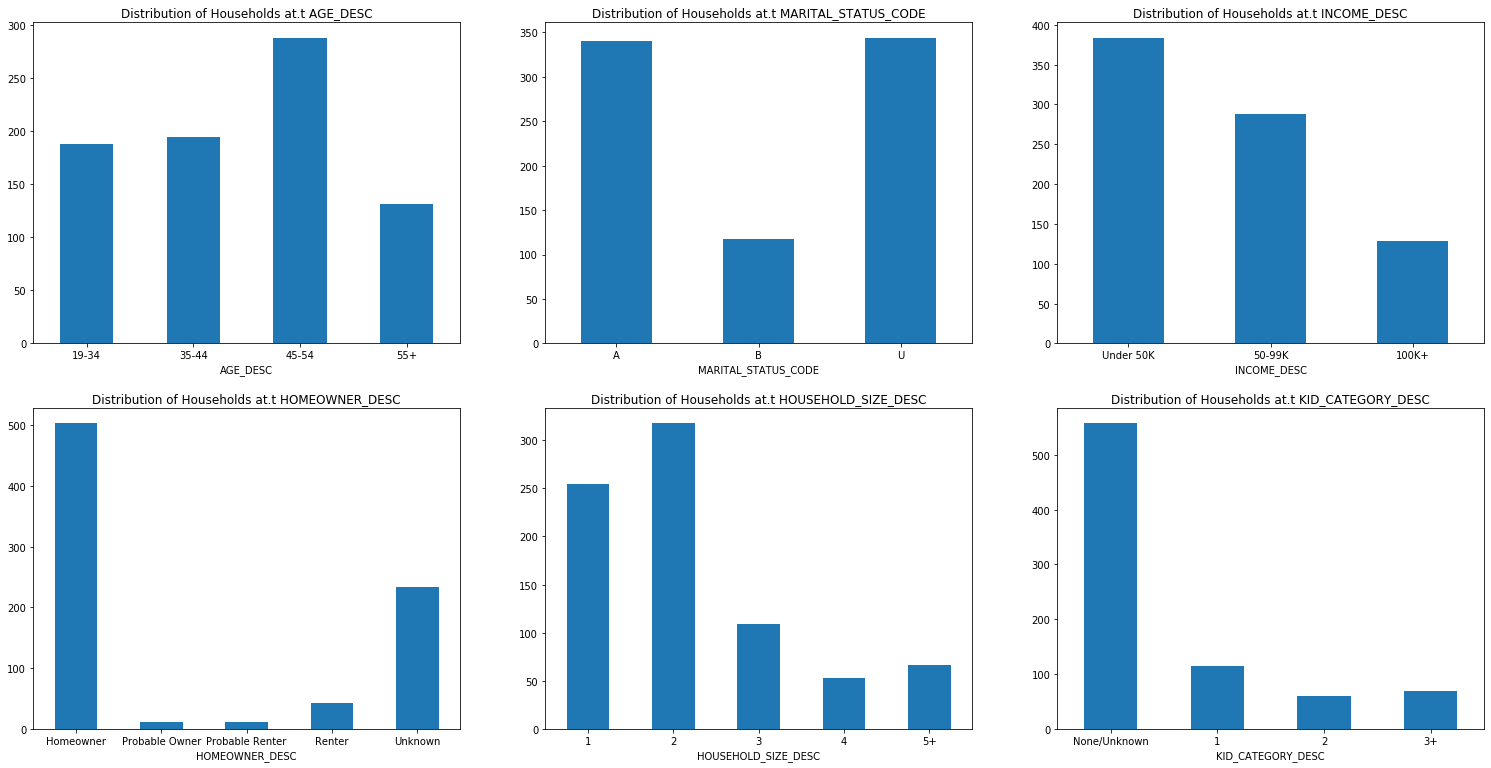

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(26,13))

for i, n in enumerate(['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC']):
    df_household.groupby(n)['household_key'].count().plot.bar(ax=axes[i // 3,i % 3], title='Distribution of Households at.t ' + n)
    axes[i // 3,i % 3].set_xticklabels(axes[i // 3,i % 3].get_xticklabels(), rotation=0)
    

## Analysis

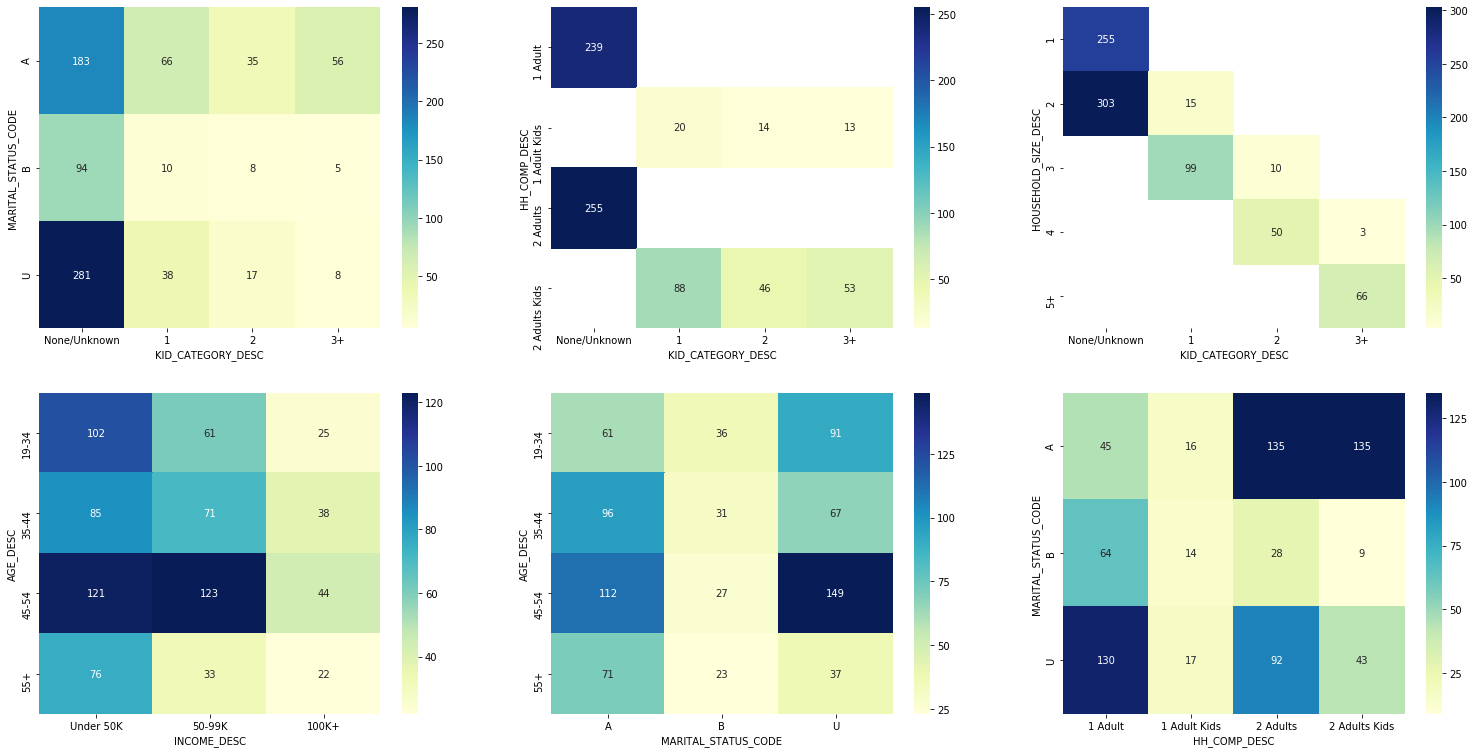

In [35]:
tuples = [ ('MARITAL_STATUS_CODE', 'KID_CATEGORY_DESC'),
 ('HH_COMP_DESC', 'KID_CATEGORY_DESC'),
 ('HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC'),
 ('AGE_DESC', 'INCOME_DESC'),
 ('AGE_DESC', 'MARITAL_STATUS_CODE'),
 ('MARITAL_STATUS_CODE', 'HH_COMP_DESC')]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(26,13))

for i, t in enumerate(tuples):
    df_dummy = df_household.groupby([t[0], t[1]]).count()\
        .reset_index().pivot(index= t[0], columns= t[1], values='household_key')
    
    sns.heatmap(df_dummy, annot=True, fmt=".0f", annot_kws={"size": 10}, cmap="YlGnBu", ax=axes[i // 3,i % 3])
    
    b, t = axes[i // 3,i % 3].set_ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    axes[i // 3,i % 3].set_ylim(b, t) # update the ylim(bottom, top) values

In [36]:
spent_by_household

,Unnamed: 0,household_key,paid_meat,paid_food,number_of_active_weeks,avg_spending_per_week,paid_veggies,avg_spending_meat_per_week,ratio_spent_for_meat,avg_spending_veggies_per_week,ratio_spent_for_veggies
0,0,1,380.95,2812.21,67,41.973284,292.81,5.685821,0.135463,4.370299,0.104121
1,1,2,225.75,1082.74,31,34.927097,58.14,7.282258,0.208499,1.875484,0.053697
2,2,3,567.90,1711.78,36,47.549444,41.01,15.775000,0.331760,1.139167,0.023958
3,3,4,177.87,679.48,25,27.179200,9.70,7.114800,0.261774,0.388000,0.014276
4,4,5,126.35,429.39,24,17.891250,10.49,5.264583,0.294255,0.437083,0.024430
...,...,...,...,...,...,...,...,...,...,...,...
2422,2422,2496,926.53,2427.30,44,55.165909,182.16,21.057500,0.381712,4.140000,0.075046
2423,2423,2497,1015.20,4589.91,81,56.665556,651.09,12.533333,0.221181,8.038148,0.141852
2424,2424,2498,260.82,1751.51,66,26.538030,94.67,3.951818,0.148912,1.434394,0.054051
2425,2425,2499,382.52,2007.24,51,39.357647,61.47,7.500392,0.190570,1.205294,0.030624


## Combined Analysis

In [37]:
df_spent_and_demog=pd.merge(df_household, spent_by_household, on='household_key', how='inner')

In [38]:
def plot_weekly_spending(df, demographic_feature, feature_name, order=None):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
    chart = sns.barplot(x = demographic_feature, y ='avg_spending_per_week', data = df, ax = axes[0], order=order)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    axes[0].set_title(f'Average Weekly Spending on Food a.t. {feature_name}')
    chart = sns.barplot(x = demographic_feature, y ='avg_spending_meat_per_week', data = df, ax = axes[1], order=order)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    axes[1].set_title(f'Average Weekly Spending on Meat a.t. {feature_name}')
    chart = sns.barplot(x = demographic_feature, y ='ratio_spent_for_meat', data = df, ax = axes[2], order=order)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    axes[2].set_title(f'Ratio Between weekly Avg. Meat and  Avg.Food Spending a.t. {feature_name}');

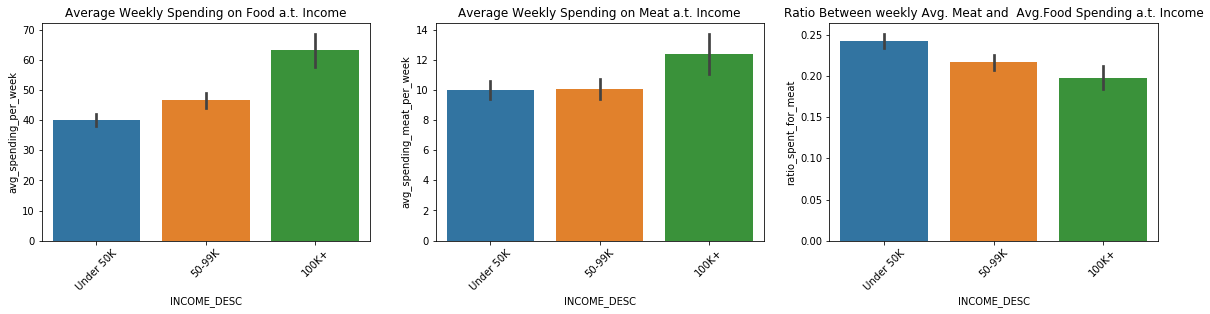

In [39]:
plot_weekly_spending(df_spent_and_demog, 'INCOME_DESC', 'Income', order=["Under 50K","50-99K", "100K+"])

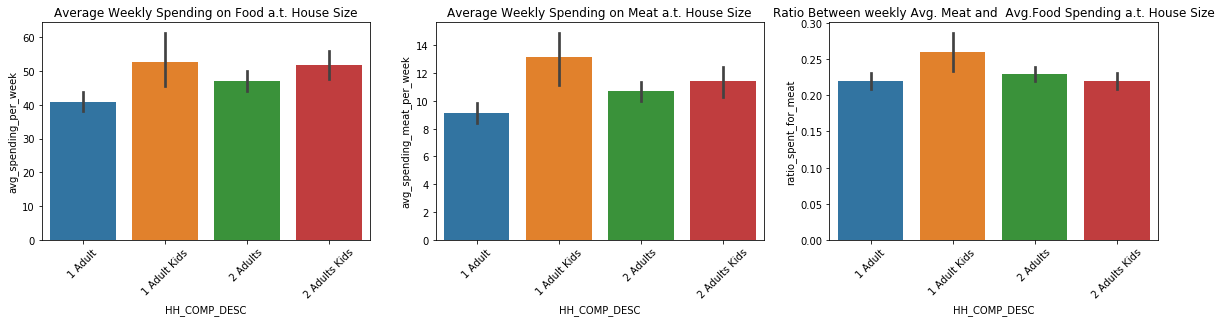

In [40]:
plot_weekly_spending(df_spent_and_demog, 'HH_COMP_DESC', 'House Size')

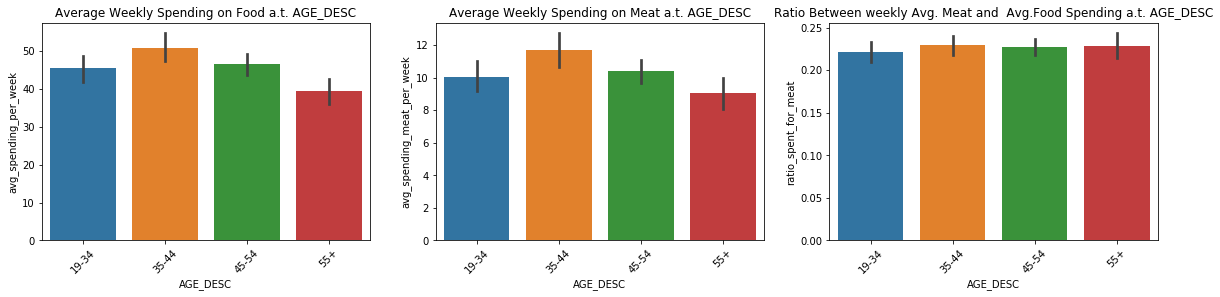

In [41]:
plot_weekly_spending(df_spent_and_demog, 'AGE_DESC', 'AGE_DESC')

In [42]:
df_spent_and_demog.columns

Index(['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'household_key', 'Unnamed: 0', 'paid_meat', 'paid_food',
       'number_of_active_weeks', 'avg_spending_per_week', 'paid_veggies',
       'avg_spending_meat_per_week', 'ratio_spent_for_meat',
       'avg_spending_veggies_per_week', 'ratio_spent_for_veggies'],
      dtype='object')

In [43]:
results = ols('paid_food ~ C(INCOME_DESC)', data = df_spent_and_demog[['paid_food','INCOME_DESC']]).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              paid_food   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     37.56
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           2.58e-16
Time:                        18:17:48   Log-Likelihood:                -7230.0
No. Observations:                 800   AIC:                         1.447e+04
Df Residuals:                     797   BIC:                         1.448e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2728.7353    104.078     26.218      0.000    2524.435    2933.035
C(INCOME_DESC)[T.50-99K]   466.9113    158.982      2.937      0.003     154.838     778.985
C(INCOME_DESC)[T.100K+]   1803.9857    208.157      8.666      0.000    1395.386    2212.586
==============================================================================
Omnibus:                      231.266   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.043
Skew:                           1.482   Prob(JB):                    4.14e-132
Kurtosis:                       6.060   Cond. No.                         3.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
results = ols('paid_meat ~ C(INCOME_DESC)', data = df_spent_and_demog[['paid_meat','INCOME_DESC']]).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              paid_meat   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.507
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           0.000589
Time:                        18:36:40   Log-Likelihood:                -6125.1
No. Observations:                 800   AIC:                         1.226e+04
Df Residuals:                     797   BIC:                         1.227e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  682.2335     26.154     26.086      0.000     630.895     733.572
C(INCOME_DESC)[T.50-99K]     0.9551     39.950      0.024      0.981     -77.465      79.376
C(INCOME_DESC)[T.100K+]    191.9230     52.307      3.669      0.000      89.247     294.599
==============================================================================
Omnibus:                      206.102   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              448.069
Skew:                           1.412   Prob(JB):                     5.05e-98
Kurtosis:                       5.338   Cond. No.                         3.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
results = ols('ratio_spent_for_meat ~ C(INCOME_DESC)', data = df_spent_and_demog).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ratio_spent_for_meat   R-squared:                       0.042
Model:                              OLS   Adj. R-squared:                  0.040
Method:                   Least Squares   F-statistic:                     17.52
Date:                  Fri, 13 Dec 2019   Prob (F-statistic):           3.56e-08
Time:                          18:46:29   Log-Likelihood:                 871.20
No. Observations:                   800   AIC:                            -1736.
Df Residuals:                       797   BIC:                            -1722.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.2430      0.004     58.370      0.000       0.235       0.251
C(INCOME_DESC)[T.50-99K]    -0.0260      0.006     -4.090      0.000      -0.038      -0.014
C(INCOME_DESC)[T.100K+]     -0.0448      0.008     -5.383      0.000      -0.061      -0.028
==============================================================================
Omnibus:                       25.634   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.752
Skew:                           0.272   Prob(JB):                     2.33e-09
Kurtosis:                       3.947   Cond. No.                         3.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
results = ols('paid_food ~ C(HH_COMP_DESC)', data = df_spent_and_demog).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              paid_food   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     5.307
Date:                Fri, 13 Dec 2019   Prob (F-statistic):            0.00127
Time:                        18:49:16   Log-Likelihood:                -6614.3
No. Observations:                 727   AIC:                         1.324e+04
Df Residuals:                     723   BIC:                         1.325e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2816.9507    140.278     20.081      0.000    2541.550    3092.351
C(HH_COMP_DESC)[T.1 Adult Kids]    827.2827    346.037      2.391      0.017     147.925    1506.640
C(HH_COMP_DESC)[T.2 Adults]        425.0725    195.246      2.177      0.030      41.756     808.389
C(HH_COMP_DESC)[T.2 Adults Kids]   787.3117    212.044      3.713      0.000     371.016    1203.608
==============================================================================
Omnibus:                      246.940   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              755.261
Skew:                           1.668   Prob(JB):                    9.93e-165
Kurtosis:                       6.716   Cond. No.                         5.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
results = ols('paid_meat ~ C(HH_COMP_DESC)', data = df_spent_and_demog).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              paid_meat   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.929
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           0.000536
Time:                        18:51:43   Log-Likelihood:                -5577.3
No. Observations:                 727   AIC:                         1.116e+04
Df Residuals:                     723   BIC:                         1.118e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          621.8754     33.694     18.457      0.000     555.726     688.025
C(HH_COMP_DESC)[T.1 Adult Kids]    295.0325     83.116      3.550      0.000     131.855     458.210
C(HH_COMP_DESC)[T.2 Adults]        112.5032     46.897      2.399      0.017      20.433     204.573
C(HH_COMP_DESC)[T.2 Adults Kids]   157.2587     50.932      3.088      0.002      57.267     257.250
==============================================================================
Omnibus:                      195.718   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.420
Skew:                           1.433   Prob(JB):                     9.45e-99
Kurtosis:                       5.586   Cond. No.                         5.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
results = ols('ratio_spent_for_meat ~ C(HH_COMP_DESC)', data = df_spent_and_demog).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ratio_spent_for_meat   R-squared:                       0.015
Model:                              OLS   Adj. R-squared:                  0.010
Method:                   Least Squares   F-statistic:                     3.555
Date:                  Fri, 13 Dec 2019   Prob (F-statistic):             0.0141
Time:                          18:53:01   Log-Likelihood:                 781.99
No. Observations:                   727   AIC:                            -1556.
Df Residuals:                       723   BIC:                            -1538.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.2205      0.005     41.183      0.000       0.210       0.231
C(HH_COMP_DESC)[T.1 Adult Kids]      0.0396      0.013      3.001      0.003       0.014       0.066
C(HH_COMP_DESC)[T.2 Adults]          0.0091      0.007      1.215      0.225      -0.006       0.024
C(HH_COMP_DESC)[T.2 Adults Kids]    -0.0010      0.008     -0.123      0.902      -0.017       0.015
==============================================================================
Omnibus:                       23.024   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.373
Skew:                           0.299   Prob(JB):                     9.34e-08
Kurtosis:                       3.844   Cond. No.                         5.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
results = ols('paid_food ~ C(AGE_DESC)', data = df_spent_and_demog).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              paid_food   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.952
Date:                Fri, 13 Dec 2019   Prob (F-statistic):            0.00206
Time:                        19:03:36   Log-Likelihood:                -7258.7
No. Observations:                 800   AIC:                         1.453e+04
Df Residuals:                     796   BIC:                         1.454e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3043.6429    154.263     19.730      0.000    2740.832    3346.454
C(AGE_DESC)[T.35-44]   515.8408    216.468      2.383      0.017      90.925     940.756
C(AGE_DESC)[T.45-54]   214.5317    198.458      1.081      0.280    -175.031     604.094
C(AGE_DESC)[T.55+]    -367.8562    240.726     -1.528      0.127    -840.388     104.676
==============================================================================
Omnibus:                      277.562   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              911.799
Skew:                           1.682   Prob(JB):                    1.01e-198
Kurtosis:                       7.005   Cond. No.                         5.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
153.8/663.523

0.23179301998574278

In [82]:
results = ols('paid_meat ~ C(AGE_DESC)', data = df_spent_and_demog).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              paid_meat   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     4.887
Date:                Fri, 13 Dec 2019   Prob (F-statistic):            0.00226
Time:                        19:12:14   Log-Likelihood:                -6125.3
No. Observations:                 800   AIC:                         1.226e+04
Df Residuals:                     796   BIC:                         1.228e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              663.5229     37.409     17.737      0.000     590.090     736.956
C(AGE_DESC)[T.35-44]   153.7956     52.494      2.930      0.003      50.752     256.839
C(AGE_DESC)[T.45-54]    57.1027     48.127      1.187      0.236     -37.368     151.573
C(AGE_DESC)[T.55+]     -48.9700     58.377     -0.839      0.402    -163.561      65.621
==============================================================================
Omnibus:                      209.157   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.364
Skew:                           1.412   Prob(JB):                    4.41e-103
Kurtosis:                       5.484   Cond. No.                         5.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
results = ols('ratio_spent_for_meat ~ C(AGE_DESC)', data = df_spent_and_demog).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ratio_spent_for_meat   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.003
Method:                   Least Squares   F-statistic:                    0.3186
Date:                  Fri, 13 Dec 2019   Prob (F-statistic):              0.812
Time:                          19:14:02   Log-Likelihood:                 854.46
No. Observations:                   800   AIC:                            -1701.
Df Residuals:                       796   BIC:                            -1682.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2216      0.006     36.447      0.000       0.210       0.234
C(AGE_DESC)[T.35-44]     0.0078      0.009      0.913      0.362      -0.009       0.025
C(AGE_DESC)[T.45-54]     0.0053      0.008      0.672      0.502      -0.010       0.021
C(AGE_DESC)[T.55+]       0.0068      0.009      0.717      0.474      -0.012       0.025
==============================================================================
Omnibus:                       25.686   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.754
Skew:                           0.309   Prob(JB):                     1.72e-08
Kurtosis:                       3.831   Cond. No.                         5.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Results for income : 
- There is a significant increase in money spent in food with the household's income. The wealthiest households (with income higher than 100K \\$) spend as much as 66\% more than the poorest households (with income lower than 35K \\$).
- There is no difference in money spent in meat for low and middle income households. However, the high income households spend 28\% more money on meat than the other households.
- The ratio between money spent in food and in meat is statistically different for each income category. Wealthier households allocate a smaller fraction of their food budget to meat (19.8\%) than lower income households (24.3\%).

Results for household composition : 
- Food spendings per household logically increase with the number of persons in it. Furthermore, families with kids spend more than other families.
- Meat spendings follow the same logic as overall food spendings. However, households composed of an adult with kids are largely bigger meat consumers than the other households. 
- There is no statiscal difference between ratios of meat to food spendings for the households except for the households composed of an adult with kids. These households tend to allocate 4% more of their spendings to meat than the others. 

These results show that households of an adult with kids behave differently than other households. However, these results must be taken carefully as ANOVA tests behave better with samples of equal size. In our analysis, only 47 households are part of the category '1 Adult Kids', this is four times less than the second smaller category. Such a low number may result in worst quality estimates.

Results for age : 
- The food spendings don't seem to follow a clear pattern with respect to the age of the households. The youngest consumers seem to spend as much as the 45-54 years old category. However, they spend 17\% less than the 35-44 years old category and 13.7\% more than the seniors category.
- There is no difference between the age categories with respect to the meat spendings except for the 35-44 years old category that spends 23.2\% more than the others.
- There is no significant difference in ratio of spendings between age categories.

    

In [52]:
def threshold_groups(df, threshold, KEY):
    valid_indices = df.groupby([KEY[0], KEY[1]]).count()['household_key'] >= threshold
    for k0, k1 in valid_indices.index:
        if not valid_indices[k0][k1]:
            df = df[(df[KEY[0]] != k0) | (df[KEY[1]] != k1)]
    return df

def analysis_2d(df_spent_and_demog, KEY, THRESHOLD):
    COLS_OF_INTEREST = [
    "paid_meat",
    "paid_veggies",
    "number_of_active_weeks",
    "ratio_spent_for_meat",
    "ratio_spent_for_veggies",
    "avg_spending_per_week",
    ]
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(26,13))

    for i, col in enumerate(COLS_OF_INTEREST):

        df_dummy = threshold_groups(df_spent_and_demog, THRESHOLD, KEY)
        df_dummy = df_dummy.groupby([KEY[0], KEY[1]]).agg({col: 'mean'})\
                                     .reset_index().pivot(index= KEY[0], columns= KEY[1], values=col)

        sns.heatmap(df_dummy, annot=True, fmt=".04f", annot_kws={"size": 10}, cmap="YlGnBu", ax=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_title(col)
        b, t = axes[i // 3, i % 3].set_ylim() # discover the values for bottom and top
        b += 0.5 # Add 0.5 to the bottom
        t -= 0.5 # Subtract 0.5 from the top
        axes[i // 3, i % 3].set_ylim(b, t) # update the ylim(bottom, top) values

In [58]:
df_household.groupby('HH_COMP_DESC').count()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
HH_COMP_DESC,,,,,,,
1 Adult,239,239,239,239,239,239,239
1 Adult Kids,47,47,47,47,47,47,47
2 Adults,255,255,255,255,255,255,255
2 Adults Kids,187,187,187,187,187,187,187


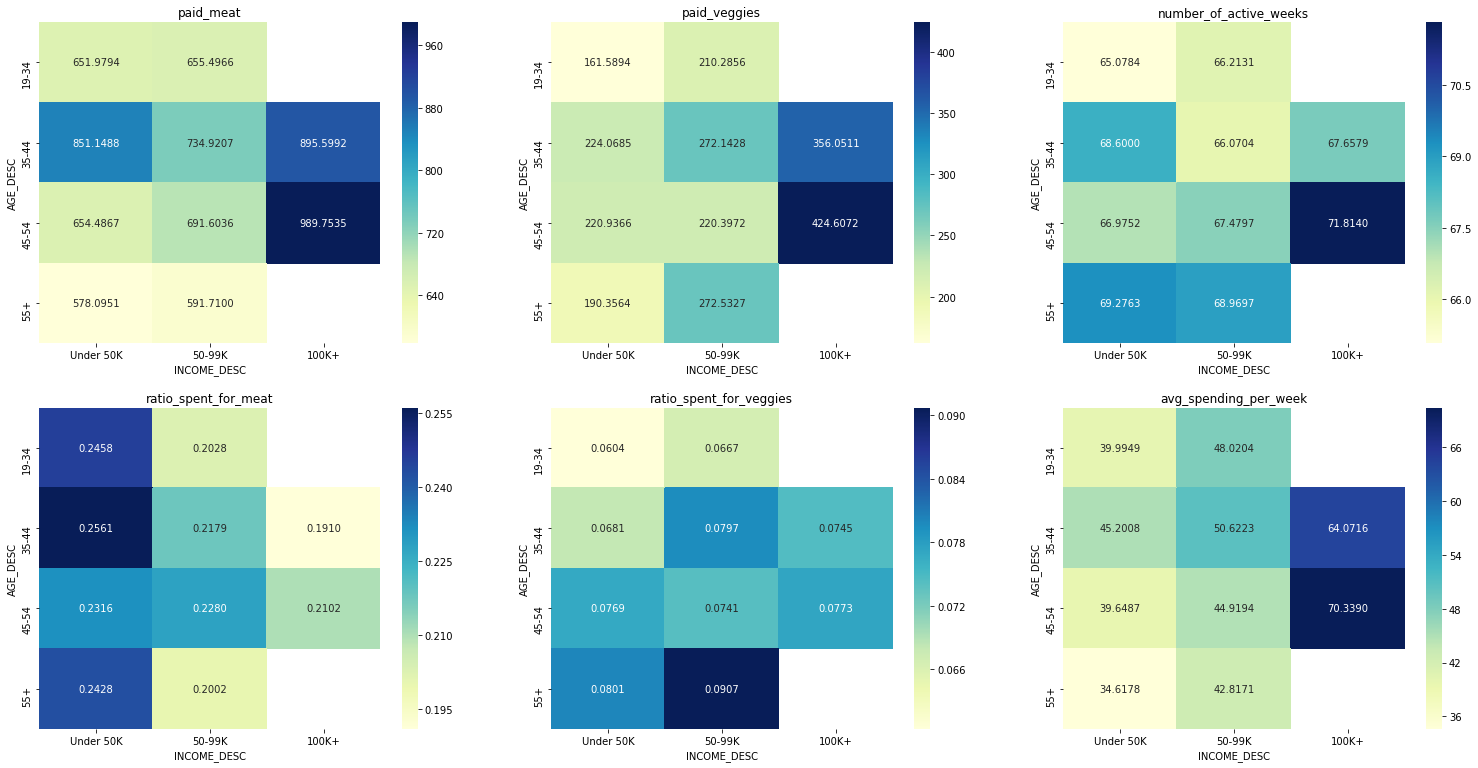

In [25]:
KEY  = ('AGE_DESC', 'INCOME_DESC')
THRESHOLD = 30,

analysis_2d(df_spent_and_demog, KEY, THRESHOLD)

In [26]:
check the type of meat ocnsumed

SyntaxError: invalid syntax (<ipython-input-26-aafda53e8846>, line 1)

In [ ]:
df_household.columns

In [ ]:
KEY  = ('INCOME_DESC', 'HOUSEHOLD_SIZE_DESC')
THRESHOLD = 0

analysis_2d(df_spent_and_demog, KEY, THRESHOLD)

In [ ]:
# determıne ıf ratıo means that rıch people buy less meat or ıf they just buy more expensıve stuff. Check average meat concumptıon normalızed by number of actıve weeks